<div style="font-family: Arial,sans-serif; color: #3070b3; font-size: 13px; line-height: 14px; margin-top:25px;">
    <div style="float:right;">
        <a href="https://www.asg.ed.tum.de/en/lmf" title="Home">
            <img src="https://upload.wikimedia.org/wikipedia/commons/c/c8/Logo_of_the_Technical_University_of_Munich.svg" alt="Technical University of Munich" style="height: 42px">
        </a>
    </div>
    <div>
        <ul style="padding: 0pt; margin: 0pt; list-style-type: none;">
            <li> <a href="https://www.asg.ed.tum.de/en/lmf/" title="Home Chair of Remote Sensing Technology" style="text-decoration: none;">Chair of Remote Sensing Technology</a></li>
            <li> <a href="https://www.ed.tum.de/en/" title="Home TUM School of Engineering and Design" style="text-decoration: none;">TUM School of Engineering and Design</a></li>
            <li> <a href="https://www.tum.de/en/" title="Home Technical University of Munich" style="text-decoration: none;"> Technical University of Munich </a></li>
        </ul>
    </div>
</div>

<div style="font-family: Arial,sans-serif; font-size: 14px; line-height: 16px; margin-top:50px; display: flow-root">
    <div style="float:left;">
        <h1>Remote Sensing Sensors</h1>
        <p style="font-size:large">Summer Term 2024</p>
    </div>
    <div style="float:right;">
        <p>
        <span style="font-size:small">Prof. Dr. rer. nat. </span><br />
        <b>Michael Einder</b>
        </p>
        <p>
        <span style="font-size:small">Prof. Dr. rer. nat. habil.</span><br />
        <b>Marco Körner</b>
        </p>
        <p>
        <span style="font-size:small">Dr.-Ing.</span><br />
        <b>Giorgio Gomba</b>
        </p>
    </div>
    <p style="clear: both;"></p>
</div>

---

## 0. Fourier Series

In [1]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
from matplotlib import colors

import seaborn as sns
import pandas as pd

from ipywidgets import interact, widgets

In [2]:
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # or 'png', 'retina', 'jpeg', 'pdf'

plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": r"\usepackage{amsmath,amsfonts,amssymb,mathtools,upgreek,siunitx}",
    "font.family": "sans-serif",
    "font.sans-serif": 'Computer Modern roman',
    "font.size": 12,
    # "figure.figsize": (12,12),
})

<div style="font-family: Arial,sans-serif; color: #3070b3; font-size: 13px; line-height: 14px;">
    <div style="float:right;">
        <a href="https://en.wikipedia.org/wiki/Joseph_Fourier" title="Jean-Baptiste Joseph Fourier">
            <img src="https://upload.wikimedia.org/wikipedia/commons/a/aa/Joseph_Fourier.jpg" alt="Jean-Baptiste Joseph Fourier" style="height: 250px">
        </a>
    </div>
</div>

### Definition

We aim to represent a continuous signal $u(t)$ by a finite series $\left\{(c_n, c_{-n})\right\}_n$ of Fourier coefficient pairs $(c_n, c_{-n}) \in \mathbb{C}^2$, i.e.,
$$
\begin{align}
  u(t) &= \sum_{n=-\infty}^{\infty} c_n \cdot \exp\left( 2 \pi \mathrm{i} \frac{n}{T} t \right) &
  , \forall | t | &< \frac{T}{2}.
\end{align}
$$
Euler's formular allows us to expand that expression into a series
$$
\begin{align}
  u(t) &= \underbrace{a_0 \sum_{n=1}^{\infty} a_n \cdot \cos\left( 2 \pi \mathrm{i} \frac{n}{T} t \right)}_{\text{even part of the signal}} + 
          \underbrace{    \sum_{n=1}^{\infty} b_n \cdot \sin\left( 2 \pi \mathrm{i} \frac{n}{T} t \right)}_{\text{odd part of the signal}}&
  , \forall | t | &< \frac{T}{2}.
\end{align}
$$
of weighted sines and cosines with $a_k = c_k + c_{-k}$ and $b_k = \mathrm{i} \cdot (c_k - c_{-k})$.

For _real-valued_ signals $u(t) \in \mathbb{R}$, the Fourier coefficients simplify to $c_{-n} = c_n^*$ and $a_0, a_n, b_n \in \mathbb{R}$.

### Basis Systems

The set of all these harmonics $\Psi_n(t) = \cos\left( 2 \pi \mathrm{i} \frac{n}{T} t \right) + \mathrm{i} \sin\left( 2 \pi \mathrm{i} \frac{n}{T} t \right)$ form a _orthonormal basis_, _i.e._, the elements $\boldsymbol{e}_k$ have unit length and their pairwise scalar products $\langle \boldsymbol{e}_k, \boldsymbol{e}_l \rangle$ vanish for $\boldsymbol{e}_k \neq \boldsymbol{e}_l$.

There are some more choices for such orthonormal bases, _e.g._, the _standard_ or _canonical basis_, the _Hadarmard_ or the _Walsh basis_.
The following plot visualizes these basis systems.

In [3]:
Fourier = lambda t, n, T: np.exp(2*np.pi*(n/T)*t*1j)
eucl    = lambda t, n, T: np.eye(max_n_fct, T)[n]

from scipy.linalg import hadamard
Hadamard = lambda t, n, T: hadamard(max_n_fct_p2)[n]

Sin = lambda t, n, T: np.sin(2*np.pi*(n/T)*t)
Cos = lambda t, n, T: np.cos(2*np.pi*(n/T)*t)

from sklearn.preprocessing import normalize
Random = lambda t, n, T: normalize(np.random.randn(10,10), axis=1, norm='l1')[n]

Bases = {'Canonical': eucl,
         'Fourier': Fourier, 
         'Sin': Sin,
         'Cos': Cos,
         'Hadamard': Hadamard,
         'Random': Random}

In [4]:
max_n_fct = 10
max_n_fct_p2 = 2**int(np.ceil(np.log2(max_n_fct)))

@interact(B = widgets.ToggleButtons(options = Bases,
                                    description = r'Basis System $B = \left\{ \Psi_{{n}} \right\}$'),
          n_fct = widgets.IntSlider(value=2, min=1, max=max_n_fct, 
                                    step=1,
                                    description='$|B|$'))
def doBasis(B, n_fct):
    T = 10
    t = np.linspace(-T/2., T/2., 100)
    N = range(0, n_fct)
    
    P = np.array([B(t, n, T) for n in N])
    
    if P.dtype == np.complex_:
        _, axs = plt.subplots(len(N), 3, figsize=(7,5), width_ratios=(2,1,1), sharex=True, sharey=True, squeeze=False)
        for n, p, ax in zip(N, P, axs):
            ax[0].plot(t,p.real, label=r'$\mathcal{R}(\Psi(t))$')
            ax[0].plot(t,p.imag, label=r'$\mathcal{I}(\Psi(t))$')
            ax[0].set_ylabel(rf'$\Psi_{{{n}}}(t)$')
            
            ax[1].plot(t,np.abs(p), label=r'$|\Psi(t)|$')
            ax[2].plot(t,np.angle(p), label=r'$\angle \Psi(t)$')

        axs[0,0].legend(loc=(0,1.1), ncol=2)
        axs[0,1].legend(loc=(0,1.1))
        axs[0,2].legend(loc=(0,1.1))
            
        for ax in axs[0]:
            ax.set_xticks((-T/2,0,T/2), [r'$-\frac{T}{2}$', r'$0$', r'$\frac{T}{2}$'])
            
    else:
        _, axs = plt.subplots(len(N), 1, sharex=True, sharey=True, squeeze=False)
        for n, p, ax in zip(N, P, axs):
            ax[0].step(range(len(p)), p, where='post', label=r'$\mathcal{R}(\Psi(t))$')

        axs[0,0].legend(loc=(0,1.1))

    plt.suptitle(rf'The first {len(N)} basis functions $\Psi_{{n}}$')
    plt.tight_layout();

    plt.figure()
    plt.imshow(np.dot(P, np.conj(P).T).real / len(t))
    plt.colorbar()

    plt.title( 'Pairwise scalar products\n of Basis functions ' \
              r'$\langle \Psi_{{k}}, \Psi_{{l}} \rangle$')
    plt.xticks(N, [rf'$\Psi_{{{n}}}$' for n in N]);
    plt.yticks(N, [rf'$\Psi_{{{n}}}^*$' for n in N]);

interactive(children=(ToggleButtons(description='Basis System $B = \\left\\{ \\Psi_{{n}} \\right\\}$', options…

### Examples

We can now try to represent particular signals through Fourier series.

#### Synthetic Toy Data

First, we start with a signal with well-known properties, _i.e._, a superposition of three sine waves
$$
\begin{align}
  u(t) &= 2 \sin\left( 2 \pi \cdot t \right) + \sin\left( 2 \pi \cdot 2t \right) + \frac{1}{2} \sin\left( 2 \pi \cdot 4t \right)\quad.
\end{align}
$$

In [5]:
from scipy.fftpack import fft, ifft, fftfreq, fftshift, ifftshift

F = 5.
T = 20.     # The length of time determines the resolution of the FFT: how many bins per Hz.
N = 10001   # The total number of points determines the resolution in time: bins per sec. 
            # This translates to the highest available frequency on the FFT
N=  2**14+1 # In general FFTs go faster if you do them over 2 to the power N points.
DT = T/N
t = np.linspace(0.,T,N)

y = 2. * np.sin(2*np.pi*1*F*t) \
  + 1. * np.sin(2*np.pi*2*F*t) \
  + 0.5* np.sin(2*np.pi*4*F*t)

# adding some noise to corrupt the ideal signal
# y += np.random.randn(len(y)) # zero-mean, unit variance

plt.plot(t,y)
plt.grid(True)
plt.xlabel(r"time (in \unit{\second})")
plt.ylabel(r"signal (in \unit{\volt})")
ax = plt.gca()
ax.set_xlim(0.,1.);


Following its defintion, this signal can be represented by three Fourier coefficients, which translate into three peaks in the respective Fourier spectrum.

In [6]:
f_fft = fftshift(fftfreq(N,DT))  # Calculate the frequencies, and shift so that f=0Hz is in the center.
y_fft = fftshift(fft(y))         # Calculate the FFT, and also shift so that f=0Hz is in the center.

plt.plot(f_fft,2./N*np.abs(y_fft)) # Note: the 2./N properly normalizes the FFT amplitude to be in Volts.
plt.grid(True)
ax = plt.gca()
ax.set_xlim(0,30)        # Zoom in: plot only from 0 to 30 Hz.
# plt.yscale("log")      # Uncomment these to get a log-y scale.
# ax.set_ylim(1e-4,1)
plt.xlabel(r"frequency (in \unit{\hertz})")
plt.ylabel(r"signal (in \unit{\volt})");


We can now try to reconstruct more complicated input signals from only the first $n < N$ Fourier descriptors $\left( a_0, a_1, \ldots, a_n \right)$.
As $n$ increases, the reconstructed signal approximates the original signal better and better, until it perfectly resembles it for $n = N$.

(Note that the slider uses a decadic logarithmic scaling. You can also chose to display the signal in $\log$ scale.)

In [7]:
from scipy import signal

fcts = {
    'square': lambda t: 0.5+0.5*signal.square(2*np.pi*F*t),
    'sawtooth': lambda t: 0.5+0.5*signal.sawtooth(2*np.pi*F*t),
    'chirp': lambda t: 0.5+0.5*signal.chirp(2*np.pi*F*t, f0=6, f1=1, t1=10, method='linear'),
    'Frequency-swept cosine': lambda t: 0.5+0.5*signal.sweep_poly(2*np.pi*F*t, np.poly1d([0.025, -0.36, 1.25, 2.0])),
}

@interact(f = widgets.ToggleButtons(description='Input signal',
                                    options = fcts))
def do(f):
    y_sq = f(t)

    plt.plot(t, y_sq)
    plt.grid(True)
    plt.xlabel(r"time (in \unit{\second})",position=(0.95,1))
    plt.ylabel(r"signal (in \unit{\volt})",position=(1,0.8))
    plt.xlim(0,1);
    plt.title('Original Signal')

    plt.figure()
    y_sq_fft = fftshift(fft(y_sq)) # Compute the FFT, and shift it so that f=0Hz is at the center (plots better)

    _, axs = plt.subplots(2,1,sharey=True)

    axs[0].semilogy(f_fft,2./N*np.abs(y_sq_fft)) # Plot log y and normalize by 2/N so spectrum is in Volt.

    axs[1].semilogy(f_fft,2./N*np.abs(y_sq_fft))
    axs[1].set_xlim(-1,100)
    axs[1].set_ylim(1e-6,1.1)

    plt.suptitle("FT spectrum")
    for ax in axs:
        ax.grid(True)
        ax.set_xlabel(r"frequency (in \unit{\hertz})")
        ax.set_ylabel(r"signal (in \unit{\volt})")

    plt.tight_layout()
    
    @interact(n = widgets.FloatLogSlider(min=0, max=(np.log10(len(y_sq_fft)//2)), 
                                         step=.1, base=10, readout_format='.0f',
                                         description=r'$n$')
                                         )
    def doReconstruct(n, showLog=False):
        y_sq_fft_ = y_sq_fft + .0

        y_sq_fft_[:len(y_sq_fft_)//2-int(n)] = 0.
        y_sq_fft_[len(y_sq_fft_)//2+int(n):] = 0.

        rev_fft_ = ifft(ifftshift(y_sq_fft_))     # Un-shift the fft spectrum first.
        rev_fft = ifft(ifftshift(y_sq_fft))

        plt.plot(t,np.real(rev_fft), alpha=.5, label='original signal')
        plt.plot(t,np.real(rev_fft_), label='reconstructed signal')

        plt.title("Inverse FT")
        plt.xlabel(r"time (in \unit{\second})",position=(0.95,1))
        plt.ylabel(r"signal (in \unit{\volt})",position=(1,0.8))
        plt.legend(loc="upper right",)

        plt.xlim(0,1.)
        if showLog:
            plt.yscale("log")
        else:        
            plt.ylim([np.min(y_sq)-.2*y_sq.ptp(), np.max(y_sq)+.2*y_sq.ptp()])

interactive(children=(ToggleButtons(description='Input signal', options={'square': <function <lambda> at 0x7fe…

#### Real-World Data

After we demonstrated the potential of Fourier series by means of synthetic signals, we're now going to investigate non-ideal real-world signals with unkown  properties and characteristics.

For this purspose, we use time series of weather stations that is stored in the file `weather.csv`. 
After this record is loaded into a Pandas dataframe, we compute the daily average temperature and discard the precipitation measurements (feel free to use further elements of that file).
The resulting uni-variate signal is then used as an input to the Fourier transform, after wich we are trying to reconstruct the signal from truncated Fourier series.

Raw data:
                STATION       DATE  PRCP   TMAX  TMIN
365  GHCND:FR013055001 1994-01-01   0.0  104.0  72.0
366  GHCND:FR013055001 1994-01-02   4.0  128.0  49.0
367  GHCND:FR013055001 1994-01-03   0.0  160.0  87.0
368  GHCND:FR013055001 1994-01-04   0.0  118.0  83.0
369  GHCND:FR013055001 1994-01-05  34.0  133.0  55.0

Preprocessed data:
                   PRCP        TMAX       TMIN
DATE                                         
1994-01-01  178.666667  127.388889  70.333333
1994-01-02  122.000000  152.421053  81.736842
1994-01-03  277.333333  157.666667  95.555556
1994-01-04  177.105263  142.210526  95.684211
1994-01-05  117.944444  130.222222  75.444444


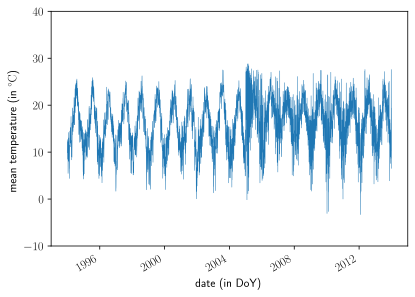

<Figure size 640x480 with 0 Axes>

In [8]:
import datetime

df0 = pd.read_csv('./data/weather.csv',
                  na_values=(-9999),
                  parse_dates=['DATE'])
df = df0[df0['DATE'] >= '19940101']
print('Raw data:\n', df.head())

df_avg = df.dropna().groupby('DATE').mean(['TMAX','TMIN','PRCP'])
print('\nPreprocessed data:\n', df_avg.head())

# pd.to_datetime(df_avg.index)
date = pd.to_datetime(df_avg.index)
temp = (df_avg['TMAX'] + df_avg['TMIN']) / 20.
N = len(temp)

plt.figure()
temp.plot(ax=plt.gca(), lw=.5)
plt.ylim(-10, 40)
plt.xlabel('date (in DoY)')
plt.ylabel(r'mean temperature (in \unit{\degreeCelsius})');


plt.figure();
y_sq = np.array(temp)
y_sq_fft = fftshift(fft(y_sq)) # Compute the FFT, and shift it so that f=0Hz is at the center (plots better)

_, axs = plt.subplots(2,1,sharey=True)

axs[0].semilogy(2./N*np.abs(y_sq_fft)) # Plot log y and normalize by 2/N so spectrum is in Volt.

axs[1].semilogy(2./N*np.abs(y_sq_fft))
axs[1].set_xlim(len(y_sq_fft)//2-1,len(y_sq_fft)//2+100)
# axs[1].set_ylim(1e-6,1.1)

plt.suptitle("FT spectrum")
for ax in axs:
    ax.grid(True)
    ax.set_xlabel(r"frequency (in \unit{\hertz})")
    ax.set_ylabel(r"signal (in \unit{\volt} V)")
    
plt.tight_layout()

In [9]:
@interact(N = widgets.IntSlider(min=0, max=(len(y_sq_fft)//2), step=1),
          R = widgets.IntRangeSlider(min=0, max=len(y_sq_fft), value=[0, len(y_sq_fft)]))
def doReconstruct(N, R):
    y_sq_fft_ = y_sq_fft + .0

    y_sq_fft_[:len(y_sq_fft_)//2-N] = 0.
    y_sq_fft_[len(y_sq_fft_)//2+N:] = 0.

    rev_fft = ifft(ifftshift(y_sq_fft))
    rev_fft_ = ifft(ifftshift(y_sq_fft_))
    
    plt.plot(np.abs(rev_fft), alpha=.5, label='original signal')
    plt.plot(np.abs(rev_fft_), label='reconstructed signal')
    plt.xlim(R)
    
    plt.xlabel('date (in DoY)')
    plt.ylabel(r'mean temperature (in \unit{\degreeCelsius})');

interactive(children=(IntSlider(value=0, description='N', max=3641), IntRangeSlider(value=(0, 7282), descripti…